## Imports

In [1]:
import os
current_file_dir = os.getcwd()
os.chdir("../../codes/")

from src.load_explanations import load_explanations_of_many_models, _unify_lenths, _trim_image_path
from src import strings_to_classes_mappings

from src.compare_explanations import compare_explanations, cosine_similarity_distance_with_stdev_and_mean, radial_basis_function_distance_with_stdev_and_mean
from src.load_explanations import load_explanations_of_many_models

os.chdir(current_file_dir)

# Usage example

Get possible models etc.

In [2]:
print("Possible datasets:", list(strings_to_classes_mappings.datasets_mapping.keys()))
print("Possible models:", list(strings_to_classes_mappings.models_mapping.keys()))
print("Possible explanations:", list(strings_to_classes_mappings.explanations_mapping.keys()))
models_list = list(strings_to_classes_mappings.models_mapping.keys())

Possible datasets: ['imagenette2']
Possible models: ['ConvNeXtV2_Nano', 'DeiT_S', 'DeiT_T', 'DenseNet121', 'EfficientNet_B3', 'EfficientNet_B4', 'MobileNetV3', 'PyramidViT_V2_B2', 'Res2Net50', 'ResNet18', 'ResNet50', 'ResNeXt50', 'Swin_T', 'ViT_B_32']
Possible explanations: ['GradCAM', 'IntegratedGradients', 'KernelSHAP']


# Loading data

In [3]:
import os
current_file_dir = os.getcwd()
os.chdir("../../codes/")
from src.utils import models_to_architecture_mapping
os.chdir(current_file_dir)

In [4]:
similarity_matriced_csvs = [f for f in os.listdir('.') if f.endswith('.csv') and f.startswith('cohens_kappa')]
similarity_matriced_csvs

['cohens_kappa_matrix_gradcam.csv']

## Heatmaps of dissimilarities

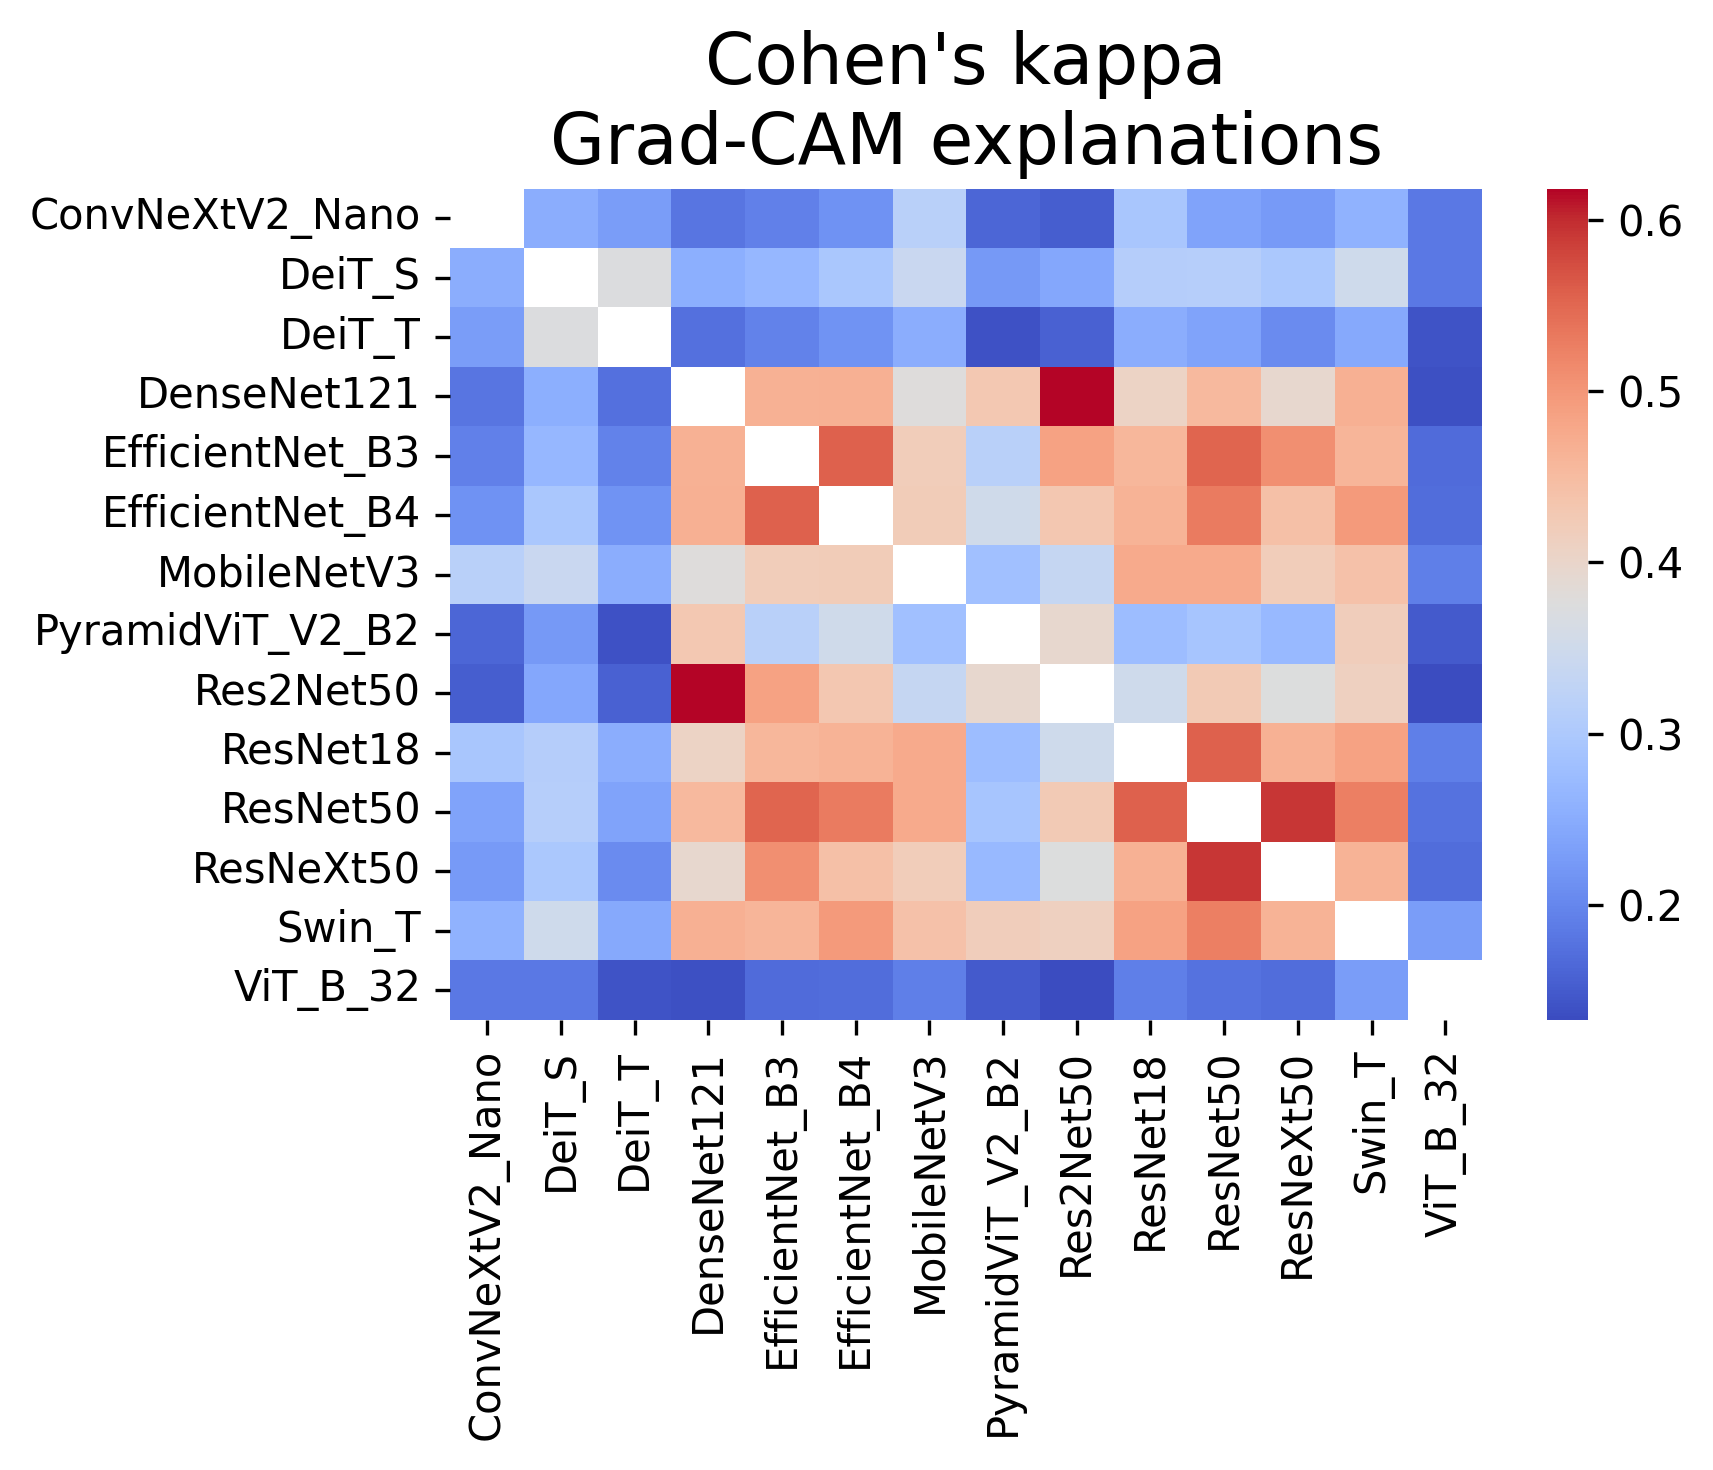

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# plot heatmap
def plot_heatmap(df, title, output_filename):
    mask = np.eye(df.shape[0], dtype=bool)
    fig, ax = plt.subplots(figsize=(6, 5), dpi=300)
    sns.heatmap(df, mask=mask, cmap='coolwarm', ax=ax)
    plt.title(title, fontsize=17)
    plt.tight_layout()
    plt.savefig(output_filename)
    plt.show()

for csv_name in similarity_matriced_csvs:
    explanation_method = 'gradcam'
    similarity_metric = 'cohens_kappa'
    title = f"Cohen's kappa\nGrad-CAM explanations"
    df = pd.read_csv(csv_name, index_col=0)
    plot_heatmap(df, title=title, output_filename=f"heatmap_{explanation_method}_{similarity_metric}.png")

# Community detection - Louvain

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import louvain_partitions, louvain_communities

In [7]:
def plot_communities(communities, title, output_filename=None, dpi=300):

    node_colors = {}
    for i, community in enumerate(communities):
        for node in community:
            node_colors[node] = i

    colors = [node_colors[node] for node in G.nodes]
    plt.figure(figsize=(7,5), dpi=dpi)
    ax = plt.gca()
    ax.set_title(title, fontsize=17)
    nx.draw(G, node_color=colors, with_labels=True, cmap=plt.cm.tab20, node_size=1000, font_size=10, font_color='black', edge_color='gray', font_weight='bold', ax=ax)
    _ = ax.axis('off')
    plt.tight_layout()
    if output_filename:
        plt.savefig(output_filename)
    plt.show()

In [8]:
tweaked_csv_name_to_resolution_mapping = {
    'cohens_kappa_matrix_gradcam.csv' : 1.06,
}

cohens_kappa_matrix_gradcam.csv


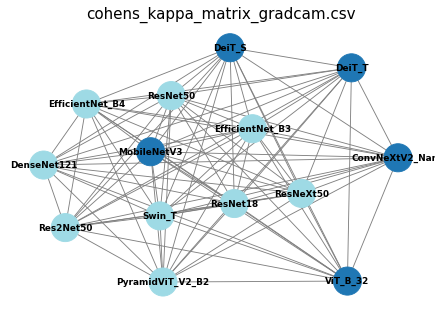

In [9]:
i_to_plot = 0
print(similarity_matriced_csvs[i_to_plot])
df = pd.read_csv(similarity_matriced_csvs[i_to_plot], index_col=0)
np.fill_diagonal(df.values, 0)
G = nx.from_pandas_adjacency(df)
resolution = 1.06
communities = louvain_communities(G, resolution=resolution, seed=42)
plot_communities(communities, title=similarity_matriced_csvs[i_to_plot], dpi=64)

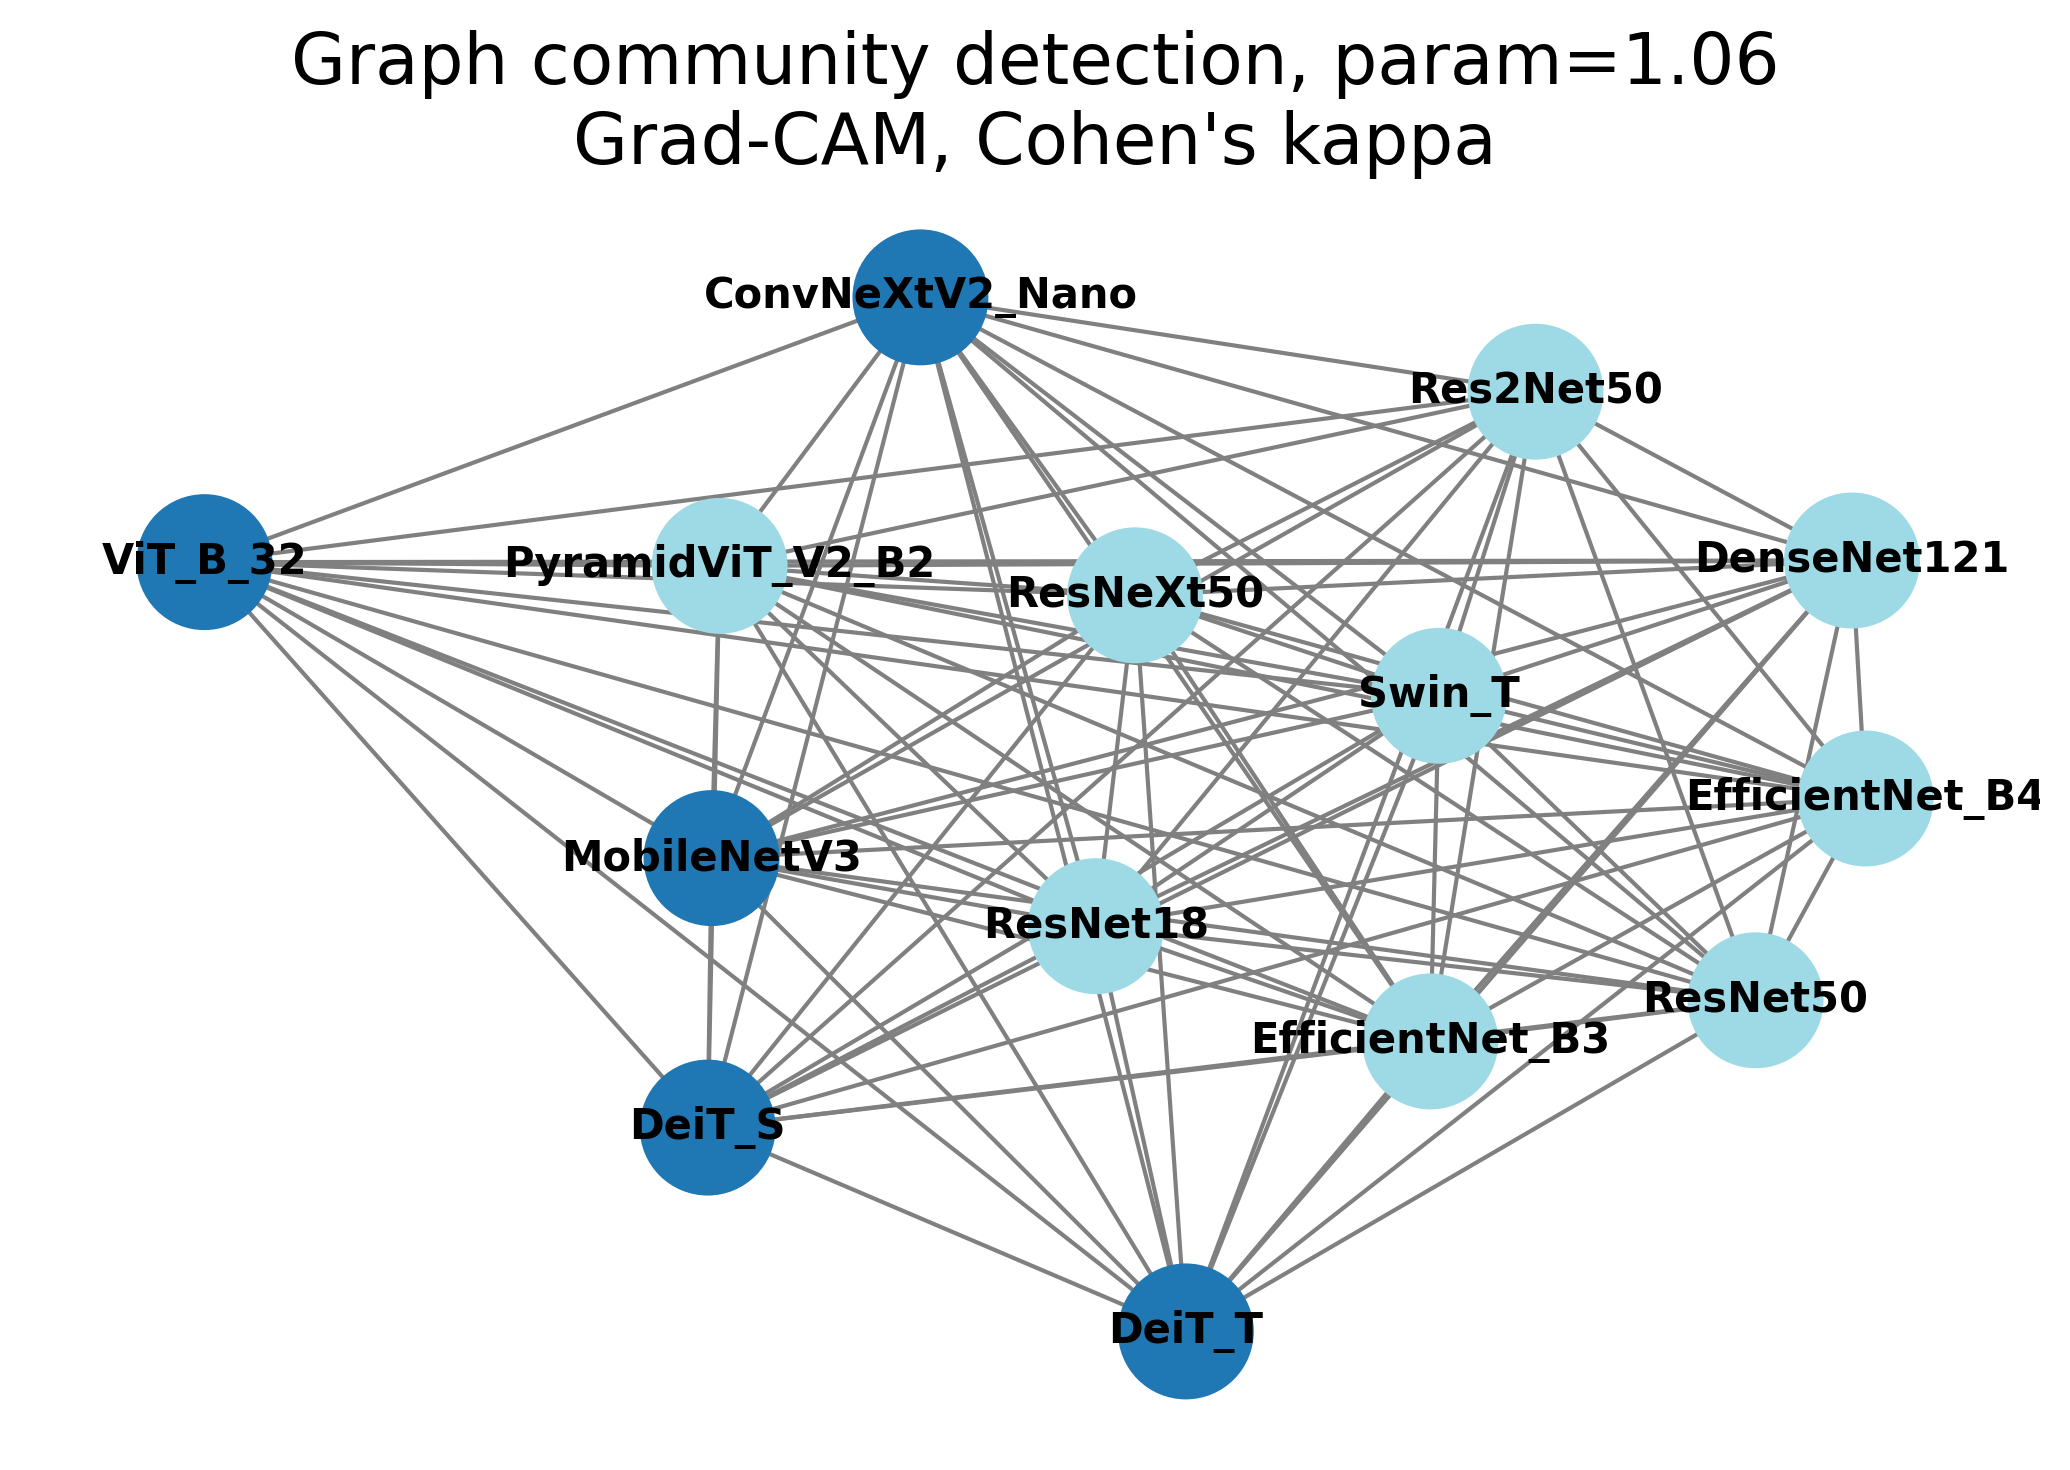

In [11]:

explanation_method = 'gradcam'
similarity_metric = 'cohens_kappa'

for csv_name in similarity_matriced_csvs:
    resolution = tweaked_csv_name_to_resolution_mapping[csv_name]
    explanation_method, similarity_metric
    title = f"Graph community detection, param={resolution}\nGrad-CAM, Cohen's kappa"
    output_filename = f'graph_louvain_{explanation_method}_{similarity_metric}.png'
    df = pd.read_csv(csv_name, index_col=0)
    np.fill_diagonal(df.values, 0)
    G = nx.from_pandas_adjacency(df)
    communities = louvain_communities(G, resolution=resolution, seed=42)
    plot_communities(communities, title=title, output_filename=output_filename)


# Hierarchical clustering

In [27]:
# loaded as 'higher=more similar', invert to distance
df = 1 - pd.read_csv(similarity_matriced_csvs[0], index_col=0)
np.fill_diagonal(df.values, 0)
df

,ConvNeXtV2_Nano,DeiT_S,DeiT_T,DenseNet121,EfficientNet_B3,EfficientNet_B4,MobileNetV3,PyramidViT_V2_B2,Res2Net50,ResNet18,ResNet50,ResNeXt50,Swin_T,ViT_B_32
ConvNeXtV2_Nano,0.000000,0.747615,0.771896,0.820854,0.806312,0.786717,0.684597,0.837912,0.846524,0.706165,0.764370,0.774632,0.741203,0.816227
DeiT_S,0.747615,0.000000,0.627625,0.745506,0.733478,0.705230,0.660217,0.777143,0.758695,0.689236,0.686887,0.702849,0.650006,0.817103
DeiT_T,0.771896,0.627625,0.000000,0.825304,0.805117,0.784113,0.748555,0.859853,0.843698,0.747894,0.763180,0.793642,0.753267,0.858588
DenseNet121,0.820854,0.745506,0.825304,0.000000,0.534670,0.533181,0.621980,0.571144,0.382032,0.592430,0.545898,0.603620,0.532981,0.862309
EfficientNet_B3,0.806312,0.733478,0.805117,0.534670,0.000000,0.443033,0.579472,0.684677,0.513479,0.542707,0.446778,0.491224,0.540194,0.831445
EfficientNet_B4,0.786717,0.705230,0.784113,0.533181,0.443033,0.000000,0.578741,0.648356,0.568943,0.536809,0.470702,0.557296,0.503489,0.829005
MobileNetV3,0.684597,0.660217,0.748555,0.621980,0.579472,0.578741,0.000000,0.717927,0.665881,0.525858,0.524290,0.579394,0.558206,0.808432
PyramidViT_V2_B2,0.837912,0.777143,0.859853,0.571144,0.684677,0.648356,0.717927,0.000000,0.603594,0.724144,0.708580,0.730260,0.582148,0.849826
Res2Net50,0.846524,0.758695,0.843698,0.382032,0.513479,0.568943,0.665881,0.603594,0.000000,0.649899,0.574332,0.624445,0.588303,0.866620
ResNet18,0.706165,0.689236,0.747894,0.592430,0.542707,0.536809,0.525858,0.724144,0.649899,0.000000,0.442896,0.534481,0.513690,0.809250


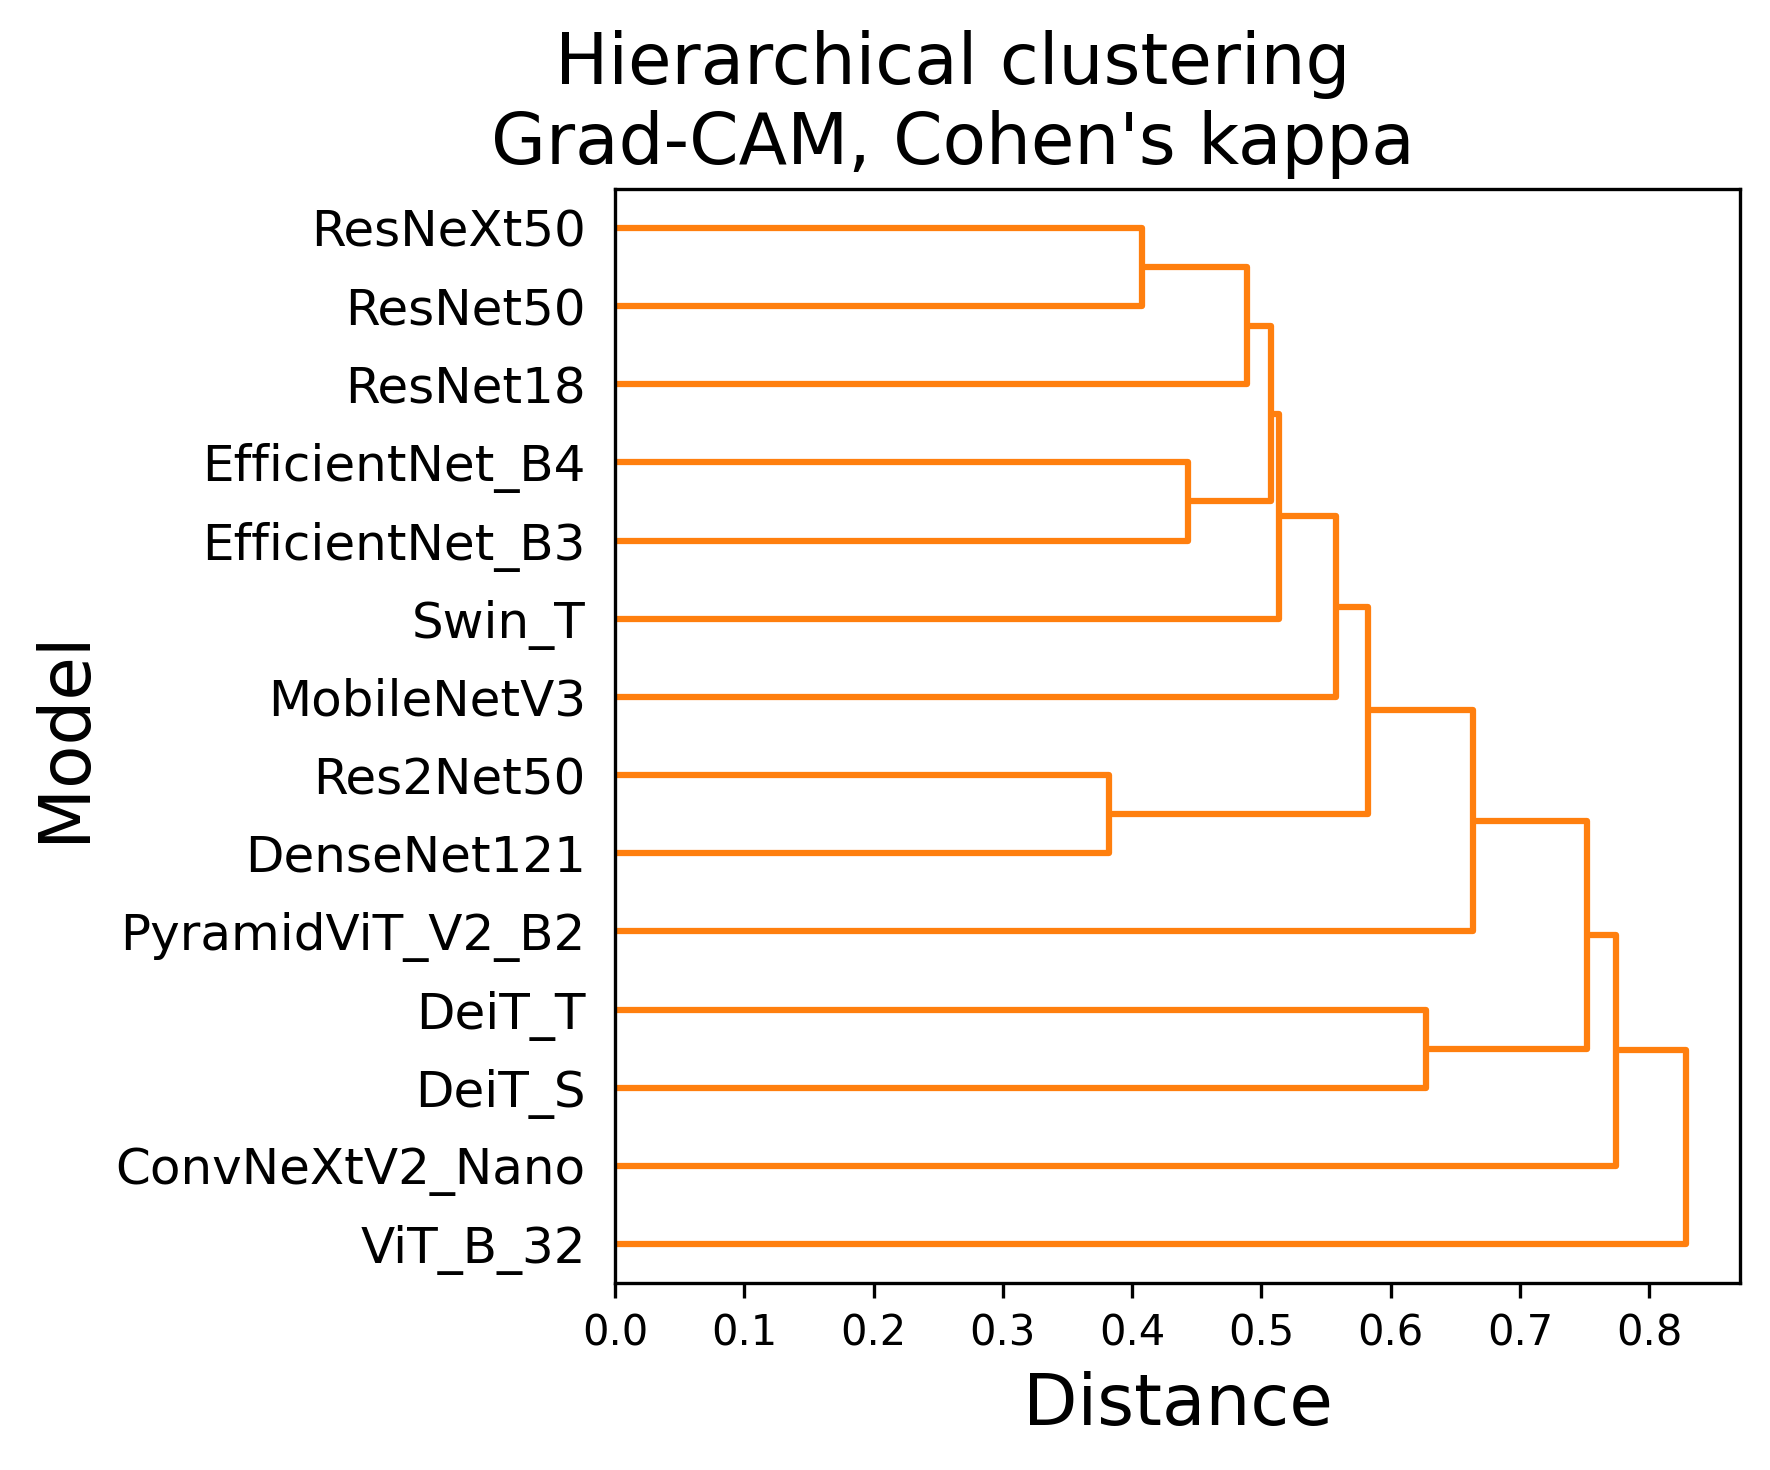

,cluster
ConvNeXtV2_Nano,0
DeiT_S,1
DeiT_T,1
DenseNet121,1
EfficientNet_B3,1
EfficientNet_B4,1
MobileNetV3,1
PyramidViT_V2_B2,1
Res2Net50,1
ResNet18,1


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

def hierarchical_clustering(df, title, output_filename=None, color_threshold=1.04):
    similarity_matrix = df.values
    distance_matrix = similarity_matrix    
    condensed_dist_matrix = squareform(distance_matrix)
    Z = linkage(condensed_dist_matrix, method='average')
    plt.figure(figsize=(6, 5), dpi=300)
    dendrogram(Z, labels=df.index, orientation='right', color_threshold=color_threshold) # threshold here matches 3 clusters
    plt.title(title, fontsize=17, x=0.3)
    # move title to be centered not above the plot but a bit to the left
    plt.ylabel('Model', fontsize=17)
    plt.xlabel('Distance', fontsize=17)
    plt.tight_layout()
    if output_filename:
        plt.savefig(output_filename)
    plt.show()
    
    # clusters
    clusters = cut_tree(Z, n_clusters=3)
    clusters_df = pd.DataFrame(clusters, index=df.index, columns=['cluster'])
    clusters_df = clusters_df.sort_values(by='cluster')
    
    return Z, clusters_df

output_filename = f'dendrogram_hierarchical_gradcam_cohens_kappa.png'
Z, clusters = hierarchical_clustering(df, title="Hierarchical clustering\nGrad-CAM, Cohen's kappa", color_threshold=2,
                                      output_filename=output_filename)
clusters